In [1]:
import tensorflow as tf
import numpy as np

## Loading data

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(rescale=1.0/255)

In [3]:
# directory
imgdir = 'a5_images'
img_size = 64
batch_size = 32

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1600 images belonging to 2 classes.


In [4]:
Xbatch, Ybatch = train_generator.next()

In [5]:
Xbatch.shape

(32, 64, 64, 3)

In [6]:
Ybatch[4]

1.0

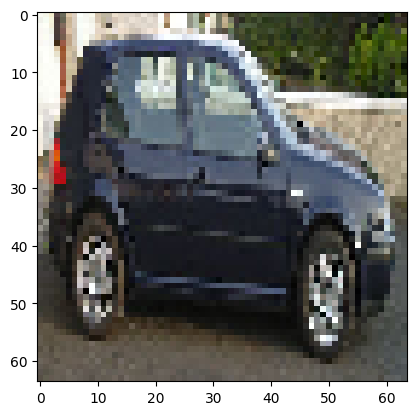

In [7]:
from matplotlib import pyplot as plt

plt.imshow(Xbatch[4]);

In [8]:
validation_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 576 images belonging to 2 classes.


## Part 1: Training a convolutional neural network

In [25]:
from tensorflow.keras import datasets, layers, models

def make_convnet():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3), padding="same"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(rate=0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(rate=0.5))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

In [26]:
model = make_convnet()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 8, 8, 64)        

In [27]:
nb_epochs = 15

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs)

Epoch 1/15
50/50 [==============================] - 12s 222ms/step - loss: 0.6853 - accuracy: 0.5650 - val_loss: 0.6427 - val_accuracy: 0.6406
Epoch 2/15
50/50 [==============================] - 8s 168ms/step - loss: 0.6224 - accuracy: 0.6769 - val_loss: 0.5439 - val_accuracy: 0.7240
Epoch 3/15
50/50 [==============================] - 8s 162ms/step - loss: 0.5163 - accuracy: 0.7575 - val_loss: 0.5048 - val_accuracy: 0.7639
Epoch 4/15
50/50 [==============================] - 8s 161ms/step - loss: 0.4770 - accuracy: 0.7875 - val_loss: 0.4590 - val_accuracy: 0.7882
Epoch 5/15
50/50 [==============================] - 8s 159ms/step - loss: 0.4244 - accuracy: 0.8169 - val_loss: 0.4744 - val_accuracy: 0.7847
Epoch 6/15
50/50 [==============================] - 8s 159ms/step - loss: 0.3876 - accuracy: 0.8325 - val_loss: 0.5178 - val_accuracy: 0.7812
Epoch 7/15
50/50 [==============================] - 9s 175ms/step - loss: 0.3620 - accuracy: 0.8494 - val_loss: 0.4785 - val_accuracy: 0.7899
Epoch

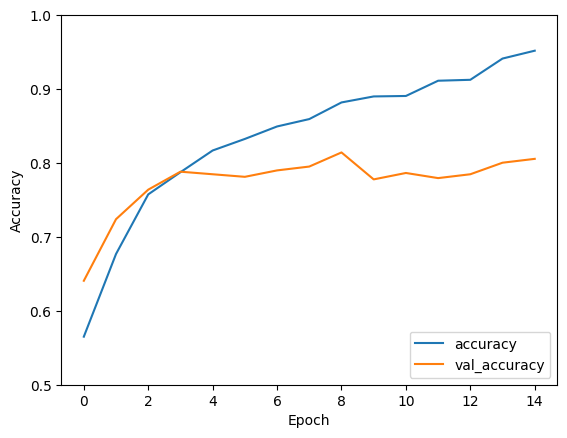

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [15]:
model.save_weights("my_model_PA5")

## Part 2: Data augmentation

In [35]:
data_augmentation_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.5,1.5],
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    horizontal_flip=True
)

In [36]:
train_generator_augmentation = data_augmentation_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1600 images belonging to 2 classes.


In [39]:
model = make_convnet()

history = model.fit(
    train_generator_augmentation,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs)

50/50 [==============================] - 11s 226ms/step - loss: 0.6778 - accuracy: 0.5869 - val_loss: 0.6651 - val_accuracy: 0.6719
Epoch 3/15
50/50 [==============================] - 10s 202ms/step - loss: 0.6462 - accuracy: 0.6363 - val_loss: 0.6346 - val_accuracy: 0.6545
Epoch 4/15
50/50 [==============================] - 10s 199ms/step - loss: 0.6120 - accuracy: 0.6794 - val_loss: 0.5996 - val_accuracy: 0.6771
Epoch 5/15
50/50 [==============================] - 10s 200ms/step - loss: 0.5695 - accuracy: 0.7175 - val_loss: 0.5310 - val_accuracy: 0.7535
Epoch 6/15
50/50 [==============================] - 10s 198ms/step - loss: 0.5734 - accuracy: 0.7138 - val_loss: 0.5375 - val_accuracy: 0.7465
Epoch 7/15
50/50 [==============================] - 10s 195ms/step - loss: 0.5370 - accuracy: 0.7469 - val_loss: 0.5001 - val_accuracy: 0.7743
Epoch 8/15
50/50 [==============================] - 10s 199ms/step - loss: 0.5367 - accuracy: 0.7538 - val_loss: 0.5042 - val_accuracy: 0.7847
Epoch 9/15

## Applying a pre-trained convolutional neural network

In [40]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

vggmodel = applications.VGG16(weights='imagenet', include_top=True)

In [43]:
image = load_img("a5_images/validation/car/0000.jpg", target_size=(224,224))

image = img_to_array(image)

image = preprocess_input(image)

image = image.reshape(1, 224, 224, 3)

In [45]:
prediction = vggmodel.predict(image)

prediction = decode_predictions(prediction)
print(prediction)

1/1 [==============================] - 0s 208ms/step
[[('n03594945', 'jeep', 0.92140687), ('n04252225', 'snowplow', 0.024327194), ('n03445924', 'golfcart', 0.014407215), ('n03930630', 'pickup', 0.012664959), ('n03478589', 'half_track', 0.005270822)]]


## Part 3: Using VGG-16 as a feature extractor

In [16]:
feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                       input_shape=(img_size, img_size, 3))

58889256/58889256 [==============================] - 5s 0us/step


In [ ]:
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
def create_vgg16_features():

In [17]:
def get_labels(n):
    return np.array([0]*(n//2) + [1]*(n//2))

## Part 4: Visualizing the learned features

In [18]:
first_layer_weights = vggmodel.get_weights()[0]
first_layer_weights.shape

(3, 3, 3, 64)

In [19]:
def kernel_image(weights, i, positive):

    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k

    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m

    return k

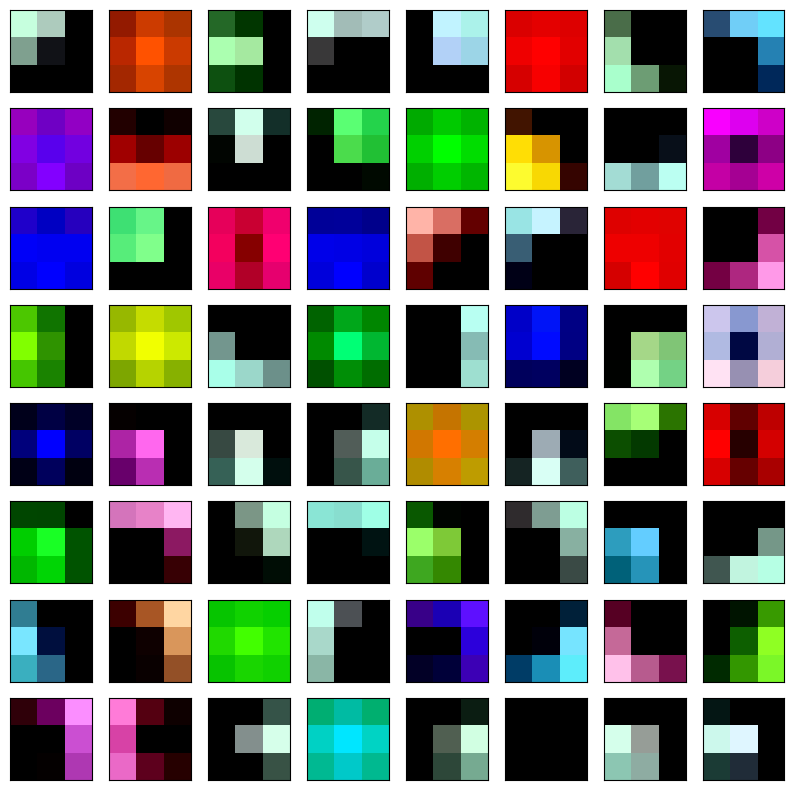

In [36]:
plt.figure(figsize=(10,10))
for i in range(first_layer_weights.shape[3]):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(kernel_image(first_layer_weights, i, True))
plt.show()